In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
house_data = pd.read_csv("house.csv")
house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


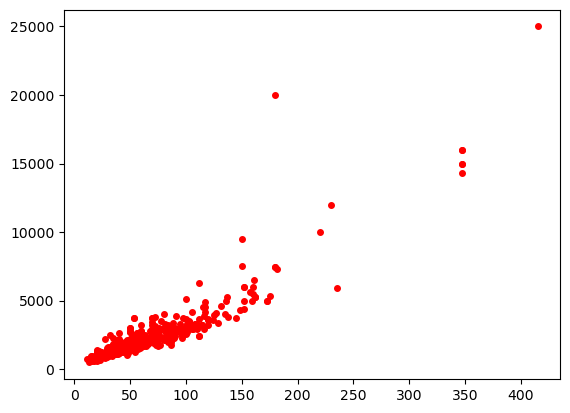

In [4]:
plt.plot(house_data["surface"], house_data["loyer"], "ro", markersize=4)
plt.show()

# Clairement le graphe montre une relation linéaire, on peut donc supposer une telle relation et 
# tenter de trouver les valeurs des coefficients.

In [5]:
# Enlevons les outliers
house_data = house_data.loc[house_data["loyer"]<10000]

In [9]:
# On s'occupe maintenant de la régression linéaire en tant que telle.
regr = LinearRegression()
regr.fit(house_data[["surface"]], house_data["loyer"])
print(regr.coef_, regr.intercept_, regr.score(house_data[["surface"]], house_data["loyer"]))

[30.66119596] 266.4546029150554 0.8246543068110018


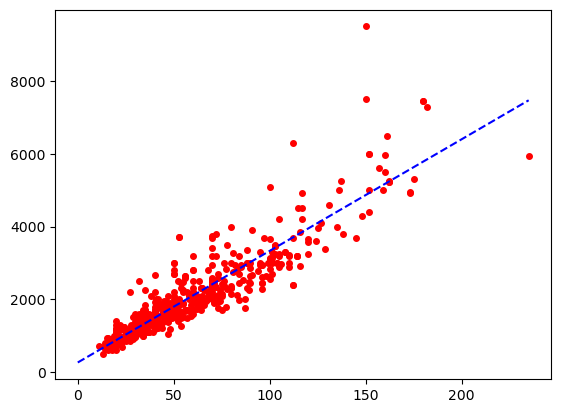

In [12]:
# Pour vérifier la validité du modèle, traçons la droite sur le même graphique que précédemment.
plt.plot(house_data["surface"], house_data["loyer"], "ro", markersize=4)
sample = np.linspace(0, house_data["surface"].max(), 1000)
line = [regr.coef_*i + regr.intercept_ for i in sample]
plt.plot(sample, line, linestyle="--", color="blue")
plt.show()

In [13]:
# Juste pour s'entraîner, imaginons que l'on veuille cette fois-ci fit un modèle quadratique. On a :
house_data["surface_carre"] = house_data["surface"].apply(lambda x: x**2)
house_data.head()

,loyer,surface,surface_carre
0,1330,37,1369
1,1400,32,1024
2,904,26,676
3,955,30,900
4,2545,70,4900


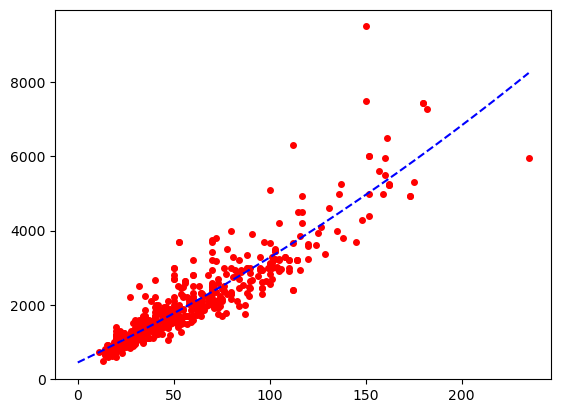

In [28]:
# Puis :
regrQuadra = LinearRegression()
regrQuadra.fit(house_data[["surface", "surface_carre"]], house_data["loyer"])

plt.plot(house_data["surface"], house_data["loyer"], "ro", markersize=4)
sample = np.linspace(0, house_data["surface"].max(), 1000)
line = [(regrQuadra.coef_*[i, i**2]).sum() + regrQuadra.intercept_ for i in sample]
plt.plot(sample, line, linestyle="--", color="blue")
plt.show()